### libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### processing dataset

In [6]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [7]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [10]:
df_attrition = pd.get_dummies(df["Attrition"],prefix = "Attrition" , dtype =int)

In [11]:
df_attrition
df = pd.concat([df,df_attrition], axis=1)

In [12]:
df['BusinessTravel'].value_counts()
df_businesstravel =pd.get_dummies(df["BusinessTravel"], prefix = "BusinessTravel" , dtype = int)

In [13]:
df = pd.concat([df,df_businesstravel],axis=1)

In [14]:
df = df.drop(['Attrition','BusinessTravel','BusinessTravel_Non-Travel','Attrition_No'],axis=1)

In [15]:
df_department = pd.get_dummies(df['Department'],prefix = "department",dtype =int)
df = pd.concat([df,df_department],axis=1)
df = df.drop(['Department','department_Human Resources'],axis =1)

In [16]:
df_education = pd.get_dummies(df['Education'], prefix = "Education" , dtype = int)
df_edufield = pd.get_dummies(df['EducationField'],prefix = "edu_field",dtype = int)
df = pd.concat([df,df_education,df_edufield],axis =1)

In [17]:
df= df.drop(['edu_field_Human Resources','Education_5','EducationField','Education'],axis=1)

In [18]:
df_gender = pd.get_dummies(df['Gender'],dtype =int)
df = pd.concat([df,df_gender],axis=1)
df = df.drop(['Gender','Male'],axis=1)

In [19]:
df_jobrole = pd.get_dummies(df['JobRole'],dtype=int)
df = pd.concat([df,df_jobrole],axis=1)
df=df.drop(['JobRole','Healthcare Representative'],axis=1)

In [20]:
df_mar = pd.get_dummies(df['MaritalStatus'],prefix = "martial status",dtype=int)
df_leg = pd.get_dummies(df['Over18'],dtype=int)
df_majdoori = pd.get_dummies(df['OverTime'],prefix = "OverTime",dtype=int)
df = pd.concat([df,df_mar,df_leg,df_majdoori],axis =1)

In [21]:
df = df.drop(['OverTime_Yes','martial status_Divorced','OverTime','MaritalStatus','Over18'],axis=1)

### input and output

In [22]:
x = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','StockOptionLevel','Attrition_Yes','edu_field_Life Sciences','edu_field_Marketing','edu_field_Medical','edu_field_Other','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'],axis =1)

In [23]:
y = df['Attrition_Yes']

### train and test

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state= 0)

### best model

C:\Users\sonal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


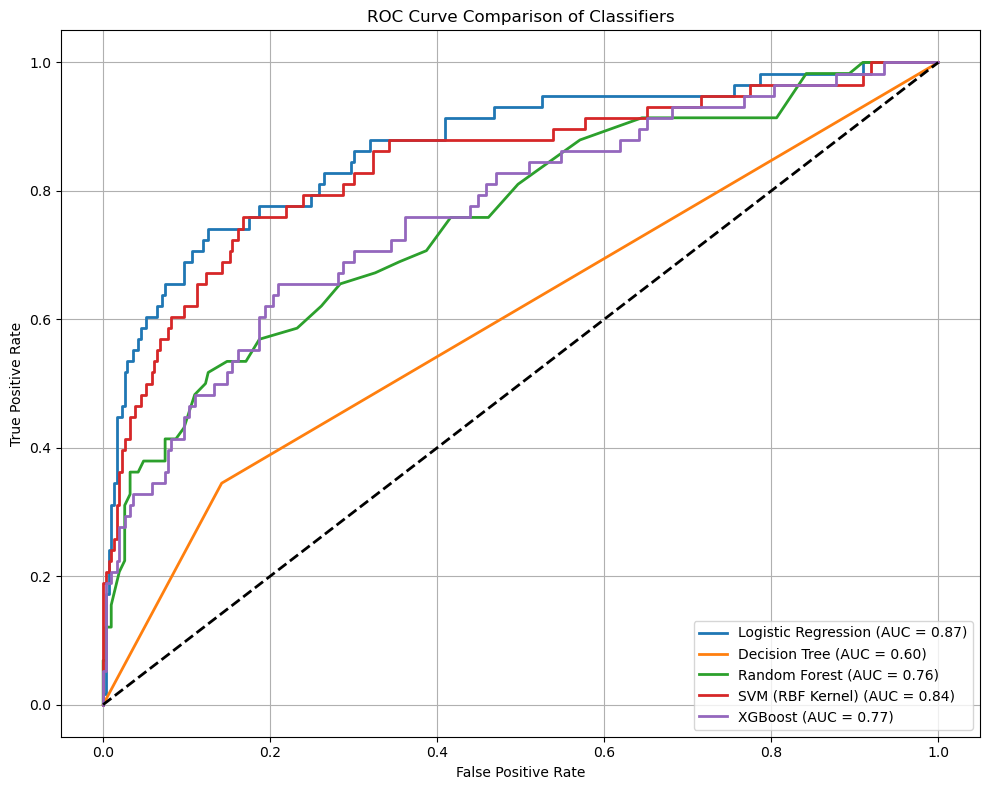

In [25]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVM (RBF Kernel)': SVC(probability=True, kernel='rbf', random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Plotting ROC Curve
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(x_train, y_train)
    
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
    else:  # For SVM with no predict_proba
        y_proba = model.decision_function(x_test)

    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Final plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


## implementing logistic regression

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(x_test)

#### downloading model

In [30]:
joblib.dump(model, 'logistic_model.joblib')

['logistic_model.joblib']

#### logistic model matrix

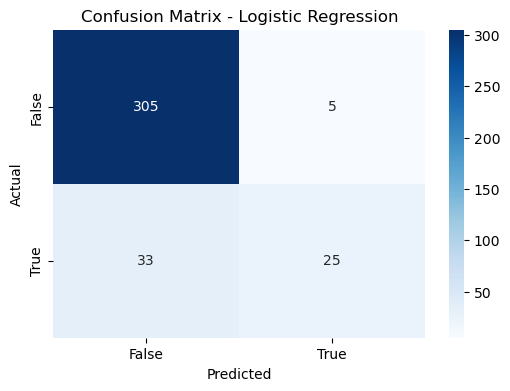

In [28]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['False', 'True'],
            yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8967391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.83      0.43      0.57        58

    accuracy                           0.90       368
   macro avg       0.87      0.71      0.75       368
weighted avg       0.89      0.90      0.88       368



In [36]:
joblib.dump(x.columns.tolist(), 'columns.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

### Random forest

Accuracy: 0.8586956521739131
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       310
           1       0.88      0.12      0.21        58

    accuracy                           0.86       368
   macro avg       0.87      0.56      0.57       368
weighted avg       0.86      0.86      0.81       368



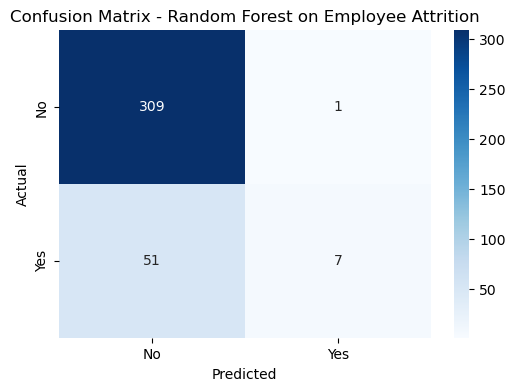

In [30]:
modelrandom= RandomForestClassifier(n_estimators=100, random_state=0)
modelrandom.fit(x_train, y_train)

# Predict
y_pred = modelrandom.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest on Employee Attrition')
plt.show()


### XGBoost

C:\Users\sonal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8641304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       310
           1       0.67      0.28      0.39        58

    accuracy                           0.86       368
   macro avg       0.77      0.63      0.66       368
weighted avg       0.84      0.86      0.84       368



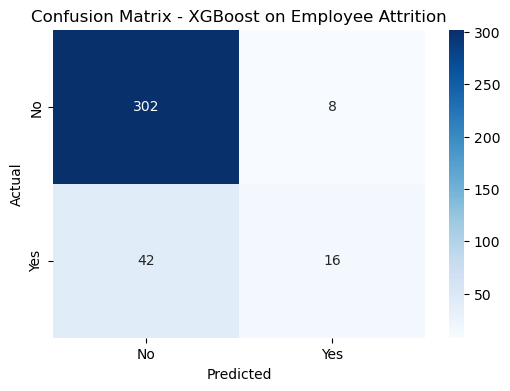

In [35]:
modelxg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modelxg.fit(x_train, y_train)

# Predict
y_pred = modelxg.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost on Employee Attrition')
plt.show()


### svm model

Accuracy: 0.8885869565217391
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.79      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.84      0.69      0.73       368
weighted avg       0.88      0.89      0.87       368



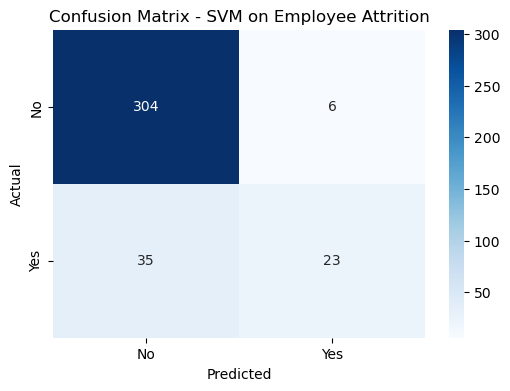

In [32]:
model = SVC(kernel='linear')  
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM on Employee Attrition')
plt.show()

### Decision tree

Accuracy: 0.7771739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       310
           1       0.31      0.34      0.33        58

    accuracy                           0.78       368
   macro avg       0.59      0.60      0.60       368
weighted avg       0.79      0.78      0.78       368



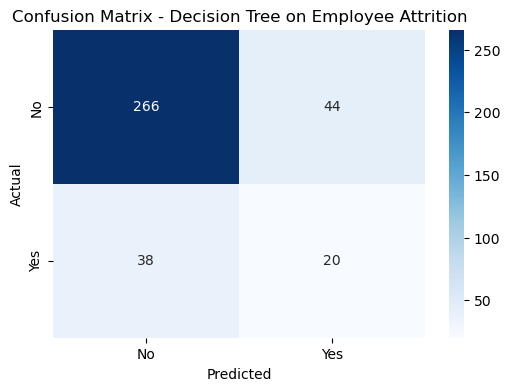

In [33]:
modeldt = DecisionTreeClassifier(random_state=42)
modeldt.fit(x_train, y_train)

# Predict
y_pred = modeldt.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree on Employee Attrition')
plt.show()